Khyati Khurana 21BDS0349


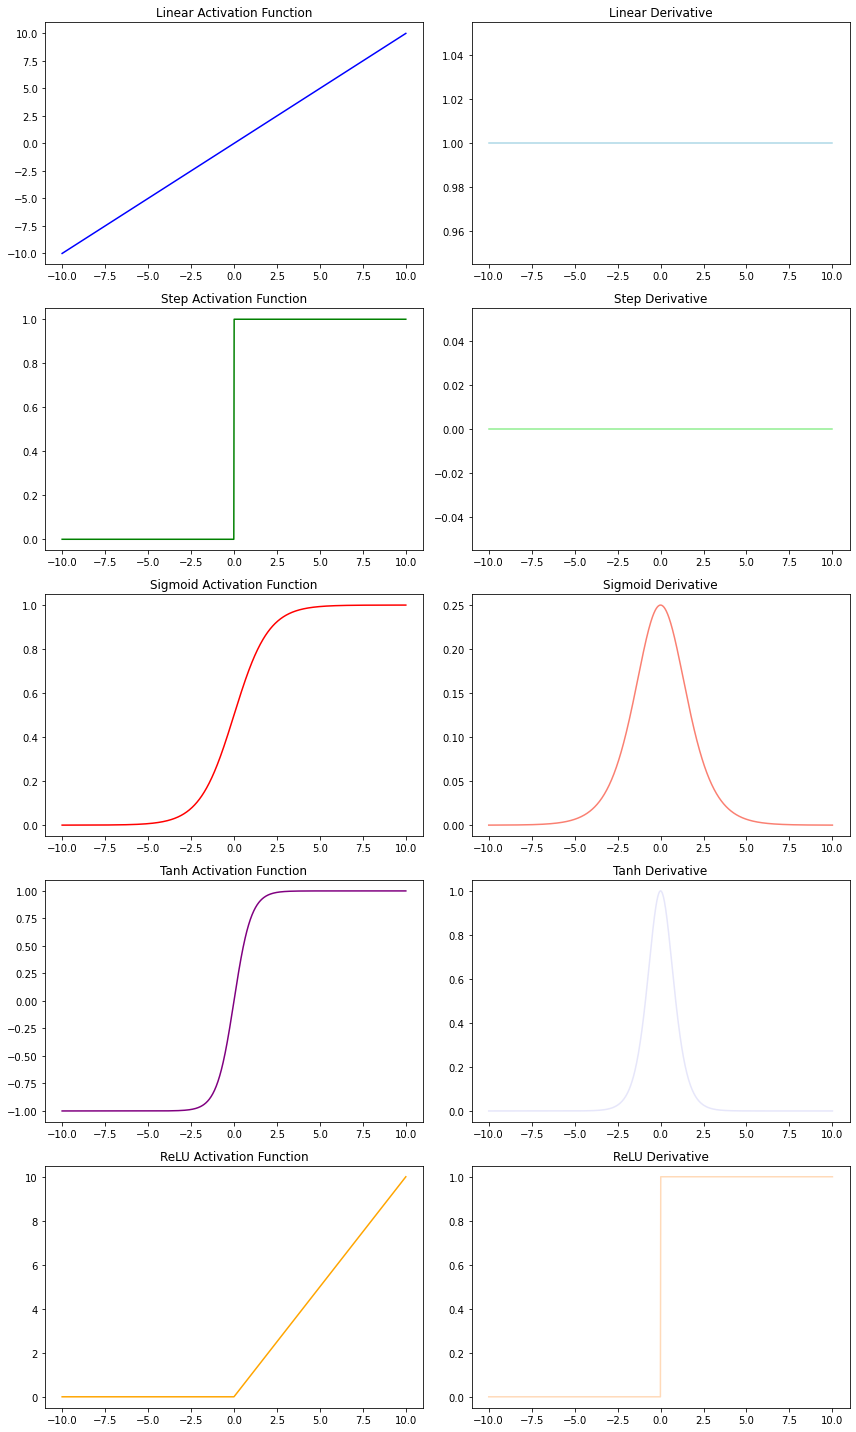

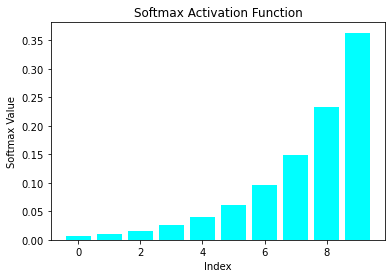

In [2]:
import numpy as np
import matplotlib.pyplot as plt
print("Khyati Khurana 21BDS0349")

# Define the range of input values
input_values = np.linspace(-10, 10, 1000)

# Define activation functions and their derivatives
def linear_activation(input_values):
    return input_values

def linear_derivative(input_values):
    return np.ones_like(input_values)

def step_activation(input_values):
    return np.where(input_values >= 0, 1, 0)

def step_derivative(input_values):
    return np.zeros_like(input_values)

def sigmoid_activation(input_values):
    return 1 / (1 + np.exp(-input_values))

def sigmoid_derivative(input_values):
    sigmoid_values = sigmoid_activation(input_values)
    return sigmoid_values * (1 - sigmoid_values)

def tanh_activation(input_values):
    return np.tanh(input_values)

def tanh_derivative(input_values):
    return 1 - np.tanh(input_values)**2

def relu_activation(input_values):
    return np.maximum(0, input_values)

def relu_derivative(input_values):
    return np.where(input_values > 0, 1, 0)

def softmax_activation(input_values):
    exp_values = np.exp(input_values - np.max(input_values))  # Subtract max for numerical stability
    return exp_values / np.sum(exp_values, axis=0)

# Plotting functions and derivatives
activation_functions = [
    ('Linear', linear_activation, linear_derivative, 'blue', 'lightblue'),
    ('Step', step_activation, step_derivative, 'green', 'lightgreen'),
    ('Sigmoid', sigmoid_activation, sigmoid_derivative, 'red', 'salmon'),
    ('Tanh', tanh_activation, tanh_derivative, 'purple', 'lavender'),
    ('ReLU', relu_activation, relu_derivative, 'orange', 'peachpuff'),
]

fig, axes = plt.subplots(len(activation_functions), 2, figsize=(12, 20))

for i, (name, activation_function, derivative_function, color_act, color_deriv) in enumerate(activation_functions):
    axes[i, 0].plot(input_values, activation_function(input_values), color=color_act)
    axes[i, 0].set_title(f'{name} Activation Function')

    axes[i, 1].plot(input_values, derivative_function(input_values), color=color_deriv)
    axes[i, 1].set_title(f'{name} Derivative')

plt.tight_layout()
plt.show()

# Special case for Softmax function
input_values_small = np.linspace(-2, 2, 10)  # Use smaller range for softmax
softmax_values = softmax_activation(input_values_small)

plt.figure(figsize=(6, 4))
plt.bar(range(len(input_values_small)), softmax_values, color='cyan')
plt.title('Softmax Activation Function')
plt.xlabel('Index')
plt.ylabel('Softmax Value')
plt.show()


Khyati Khurana 21BDS0349
Epoch 0, Loss: 0.2876471394767983
Epoch 100, Loss: 0.03870325634277265
Epoch 200, Loss: 0.02351199331365358
Epoch 300, Loss: 0.015850365802097664
Epoch 400, Loss: 0.013204445801840888
Epoch 500, Loss: 0.012548348970665962
Epoch 600, Loss: 0.012402189795305935
Epoch 700, Loss: 0.012369425495339047
Epoch 800, Loss: 0.012361657900179788
Epoch 900, Loss: 0.012359597864905012


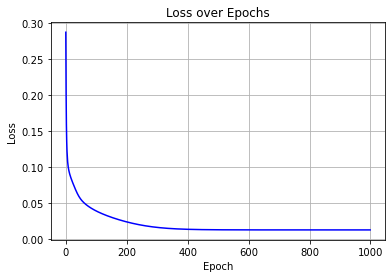

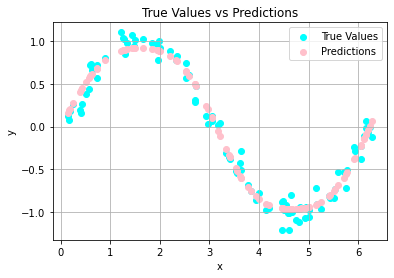

In [5]:
import numpy as np
import matplotlib.pyplot as plt
print("Khyati Khurana 21BDS0349")

np.random.seed(310)
x = np.random.rand(100, 1) * 2 * np.pi  # 100 samples between 0 and 2Ï€
y = np.sin(x) + 0.1 * np.random.randn(100, 1)  # y = sin(x) with noise

# Initialize weights randomly
w1 = np.random.randn(1, 10)
w2 = np.random.randn(10, 1)

# Define the forward pass
def forward_pass(x, w1, w2):
    a1 = np.dot(x, w1)
    z1 = np.sin(a1)
    a2 = np.dot(z1, w2)
    y_pred = np.sin(a2)
    return a1, z1, a2, y_pred

# Define the loss function (Mean Squared Error)
def compute_loss(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

# Define the backpropagation step
def backpropagation(x, y, a1, z1, a2, y_pred, w1, w2, learning_rate=0.01):
    # Compute the gradients
    dL_dy_pred = 2 * (y_pred - y) / y.size
    dL_da2 = dL_dy_pred * np.cos(a2)
    dL_dw2 = np.dot(z1.T, dL_da2)

    dL_dz1 = np.dot(dL_da2, w2.T)
    dL_da1 = dL_dz1 * np.cos(a1)
    dL_dw1 = np.dot(x.T, dL_da1)

    # Update weights
    w1 -= learning_rate * dL_dw1
    w2 -= learning_rate * dL_dw2

    return w1, w2

# Training loop
epochs = 1000
learning_rate = 0.01
losses = []

for epoch in range(epochs):
    # Forward pass
    a1, z1, a2, y_pred = forward_pass(x, w1, w2)

    # Compute loss
    loss = compute_loss(y, y_pred)
    losses.append(loss)+

    # Backpropagation
    w1, w2 = backpropagation(x, y, a1, z1, a2, y_pred, w1, w2, learning_rate)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Plot the loss over epochs with a custom color
plt.plot(losses, color='blue')  # Change to your preferred color
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Plot predictions vs true values with custom colors
plt.scatter(x, y, color='cyan', label='True Values')  # Change to your preferred color
plt.scatter(x, y_pred, color='pink', label='Predictions')  # Change to your preferred color
plt.legend()
plt.title('True Values vs Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [6]:
import pandas as pd

# Sample data
data = {
    'Age': [23, 45, 31, 27, 52, 19, 38, 41, 33, 29],
    'Weight': [65, 85, 70, 68, 90, 59, 72, 77, 69, 66],
    'Height': [1.75, 1.80, 1.78, 1.72, 1.85, 1.70, 1.76, 1.79, 1.74, 1.73]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('Age.csv', index=False)

print("Age.csv file created successfully.")

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


Age.csv file created successfully.


Khyati Khurana 21BDS0349
   Age  Weight  Height
0   23      65    1.75
1   45      85    1.80
2   31      70    1.78
3   27      68    1.72
4   52      90    1.85



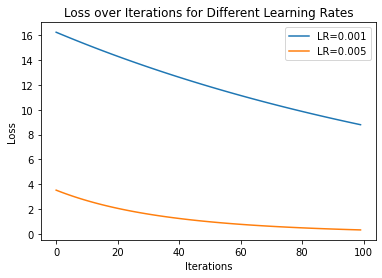



   Learning Rate  Iterations                    Weights      Bias
0          0.001         100  [-0.24910041  2.43943781] -0.256378
1          0.005         100  [-0.52470292  0.40232566]  1.226025


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print("Khyati Khurana 21BDS0349")
# Load the dataset
data = pd.read_csv('Age.csv')
print(data.head())
print()

X = data[['Age', 'Weight']].values
y = data['Height'].values

# Pre-process the data (Standardize)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# Add a column of ones to X for the bias term
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Initialize parameters
def initialize_weights(n_features):
    return np.random.randn(n_features)

# Define the model
def linear_regression(X, weights):
    return np.dot(X, weights)

# Define the loss function (Mean Squared Error)
def compute_loss(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

# Define the gradient descent algorithm
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    loss_history = []

    for i in range(iterations):
        y_pred = linear_regression(X, weights)
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

        # Compute gradients
        gradients = (2/m) * np.dot(X.T, (y_pred - y))

        # Update weights
        weights -= learning_rate * gradients

    return weights, loss_history

# Run gradient descent for different learning rates
learning_rates = [0.001, 0.005]
iterations = 100
results = []

for lr in learning_rates:
    weights = initialize_weights(X.shape[1])
    final_weights, loss_history = gradient_descent(X, y, weights, lr, iterations)
    results.append((lr, iterations, final_weights, loss_history))

    # Plot the loss over iterations
    plt.plot(range(iterations), loss_history, label=f'LR={lr}')

plt.title('Loss over Iterations for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
print()
print()
# Save results to a CSV file
results_df = pd.DataFrame({
    'Learning Rate': [lr for lr, _, _, _ in results],
    'Iterations': [iters for _, iters, _, _ in results],
    'Weights': [weights[1:] for _, _, weights, _ in results],
    'Bias': [weights[0] for _, _, weights, _ in results]
})

results_df.to_csv('output_results.csv', index=False)

# Read and print results from the CSV file
data = pd.read_csv('output_results.csv')
print(data.head())


In [8]:
# Initalizing the network

import numpy as np

def initialize_network(n_input, n_hidden, n_output):
    network = {
        'W1': np.random.randn(n_input, n_hidden) * 0.01,  # Weights for input to hidden
        'b1': np.zeros((1, n_hidden)),  # Biases for hidden layer
        'W2': np.random.randn(n_hidden, n_output) * 0.01,  # Weights for hidden to output
        'b2': np.zeros((1, n_output))  # Biases for output layer
    }
    return network

In [9]:
# Activation functions needed

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)  # Derivative of the sigmoid function

In [10]:
# Forward propogation

def forward_propagate(network, X):
    W1, b1 = network['W1'], network['b1']
    W2, b2 = network['W2'], network['b2']

    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    cache = {
        'Z1': Z1, 'A1': A1,
        'Z2': Z2, 'A2': A2
    }

    return A2, cache

In [11]:
# Back propogation

def back_propagate(network, cache, X, y, learning_rate):
    W1, b1 = network['W1'], network['b1']
    W2, b2 = network['W2'], network['b2']
    A1, A2 = cache['A1'], cache['A2']

    # Calculate the output layer error
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    # Calculate the hidden layer error
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    network['W1'], network['b1'] = W1, b1
    network['W2'], network['b2'] = W2, b2

In [12]:
# Training the network

def train_network(network, X, y, learning_rate, n_iterations):
    losses = []
    for i in range(n_iterations):
        # Forward propagation
        A2, cache = forward_propagate(network, X)

        # Calculate loss (Mean Squared Error)
        loss = np.mean((A2 - y) ** 2)
        losses.append(loss)

        # Backward propagation
        back_propagate(network, cache, X, y, learning_rate)

        if i % 100 == 0:
            print(f'Iteration {i}, Loss: {loss}')

    return losses

In [13]:
# Using the network to make predictions

def predict(network, X):
    A2, _ = forward_propagate(network, X)
    return np.argmax(A2, axis=1)  # Return the index of the highest probability

Khyati khurana 21BDS0349
Iteration 0, Loss: 0.2493307144778532
Iteration 100, Loss: 0.06420182218174103
Iteration 200, Loss: 0.01565439653586939
Iteration 300, Loss: 0.011763354676889761
Iteration 400, Loss: 0.010833007347446934
Iteration 500, Loss: 0.010449463849960402
Iteration 600, Loss: 0.010259264171676266
Iteration 700, Loss: 0.010156251538830484
Iteration 800, Loss: 0.010096972382867603
Iteration 900, Loss: 0.01006075492218317


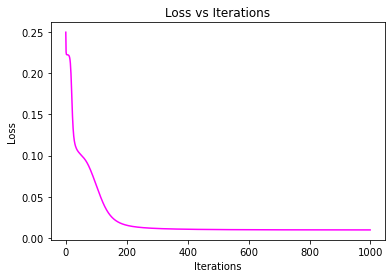

Accuracy: 100.0%


In [17]:
# Applying to solve a real-world problem
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
print("Khyati khurana 21BDS0349")
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the target
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Network parameters
n_input = X_train.shape[1]
n_hidden = 5
n_output = y_train.shape[1]
learning_rate = 0.01
n_iterations = 1000

# Initialize and train the network
network = initialize_network(n_input, n_hidden, n_output)
losses = train_network(network, X_train, y_train, learning_rate, n_iterations)

# Plot the loss curve
import matplotlib.pyplot as plt

plt.plot(losses,color = 'magenta')
plt.title('Loss vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Evaluate the model
predictions = predict(network, X_test)
accuracy = np.mean(np.argmax(y_test, axis=1) == predictions)
print(f'Accuracy: {accuracy * 100}%')


In [21]:

# Importing necessary libraries and dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
print("Khyati Khurana 21BDS0349")
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the target
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Khyati Khurana 21BDS0349


In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_network(n_input, n_hidden, n_output):
    network = {}
    network['W1'] = np.random.randn(n_input, n_hidden)
    network['b1'] = np.zeros((1, n_hidden))
    network['W2'] = np.random.randn(n_hidden, n_output)
    network['b2'] = np.zeros((1, n_output))
    return network

def forward_propagate(network, X):
    W1, b1 = network['W1'], network['b1']
    W2, b2 = network['W2'], network['b2']

    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    cache = (Z1, A1, Z2, A2)
    return A2, cache

def back_propagate(network, cache, X, y, learning_rate):
    W1, b1 = network['W1'], network['b1']
    W2, b2 = network['W2'], network['b2']
    Z1, A1, Z2, A2 = cache

    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    network['W1'], network['b1'] = W1, b1
    network['W2'], network['b2'] = W2, b2

In [23]:
# Batch Gradient Descent (BGD)
def train_bgd(network, X, y, learning_rate, n_iterations):
    losses = []
    for i in range(n_iterations):
        A2, cache = forward_propagate(network, X)
        back_propagate(network, cache, X, y, learning_rate)

        loss = np.mean((A2 - y) ** 2)
        losses.append(loss)

        if i % 100 == 0:
            print(f'Iteration {i}, Loss: {loss}')
    return losses

# Stochastic Gradient Descent (SGD)
def train_sgd(network, X, y, learning_rate, n_iterations):
    losses = []
    for i in range(n_iterations):
        loss = 0
        for j in range(X.shape[0]):
            X_j = X[j].reshape(1, -1)
            y_j = y[j].reshape(1, -1)
            A2, cache = forward_propagate(network, X_j)
            back_propagate(network, cache, X_j, y_j, learning_rate)

            loss += np.mean((A2 - y_j) ** 2)

        losses.append(loss / X.shape[0])

        if i % 100 == 0:
            print(f'Iteration {i}, Loss: {loss / X.shape[0]}')
    return losses

# Mini-Batch Gradient Descent (MBGD)
def train_mbgd(network, X, y, learning_rate, n_iterations, batch_size):
    losses = []
    for i in range(n_iterations):
        indices = np.random.permutation(X.shape[0])
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for j in range(0, X.shape[0], batch_size):
            X_batch = X_shuffled[j:j + batch_size]
            y_batch = y_shuffled[j:j + batch_size]

            A2, cache = forward_propagate(network, X_batch)
            back_propagate(network, cache, X_batch, y_batch, learning_rate)

        A2, _ = forward_propagate(network, X)
        loss = np.mean((A2 - y) ** 2)
        losses.append(loss)

        if i % 100 == 0:
            print(f'Iteration {i}, Loss: {loss}')
    return losses

Khyati Khurana 21BDS0349
Iteration 0, Loss: 0.27831239007770375
Iteration 100, Loss: 0.02020410147842346
Iteration 200, Loss: 0.012015142745611187
Iteration 300, Loss: 0.0108238972594526
Iteration 400, Loss: 0.01041453034060316
Iteration 500, Loss: 0.010232595935772682
Iteration 600, Loss: 0.010143541228359674
Iteration 700, Loss: 0.010098064941602976
Iteration 800, Loss: 0.010074350894648813
Iteration 900, Loss: 0.010061557228101413
Iteration 0, Loss: 0.3136507155921778
Iteration 100, Loss: 0.037868160718409254
Iteration 200, Loss: 0.01730812188165027
Iteration 300, Loss: 0.013019516970636491
Iteration 400, Loss: 0.011591564209611693
Iteration 500, Loss: 0.010959218051481303
Iteration 600, Loss: 0.010642519330579138
Iteration 700, Loss: 0.010472930706558536
Iteration 800, Loss: 0.010377354415238177
Iteration 900, Loss: 0.010320753802002848
Iteration 0, Loss: 0.23396467971069837
Iteration 100, Loss: 0.01981894390986788
Iteration 200, Loss: 0.01200460111629355
Iteration 300, Loss: 0.010

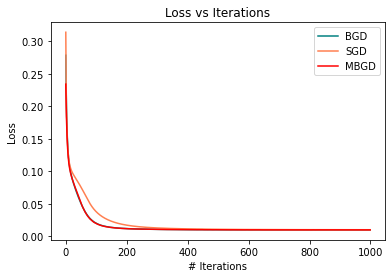

In [27]:
# Network parameters
print("Khyati Khurana 21BDS0349")
n_input = X_train.shape[1]
n_hidden = 5
n_output = y_train.shape[1]
learning_rate = 0.01
n_iterations = 1000
batch_size = 32

# Train using Batch Gradient Descent (BGD)
network_bgd = initialize_network(n_input, n_hidden, n_output)
losses_bgd = train_bgd(network_bgd, X_train, y_train, learning_rate, n_iterations)

# Train using Stochastic Gradient Descent (SGD)
network_sgd = initialize_network(n_input, n_hidden, n_output)
losses_sgd = train_sgd(network_sgd, X_train, y_train, learning_rate, n_iterations)

# Train using Mini-Batch Gradient Descent (MBGD)
network_mbgd = initialize_network(n_input, n_hidden, n_output)
losses_mbgd = train_mbgd(network_mbgd, X_train, y_train, learning_rate, n_iterations, batch_size)

# Plot the loss curves
plt.plot(losses_bgd, label='BGD',color = 'Teal')
plt.plot(losses_sgd, label='SGD', color = 'Coral')
plt.plot(losses_mbgd, label='MBGD',color = 'Red')
plt.title('Loss vs Iterations')
plt.xlabel('# Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

Khyati Khurana 21BDS0349
BGD Epoch 0, Loss: 0.9390281484965
BGD Epoch 100, Loss: 0.7104065513208719
BGD Epoch 200, Loss: 0.6858496733492351
BGD Epoch 300, Loss: 0.6667497044308972
BGD Epoch 400, Loss: 0.6495808179141004
BGD Epoch 500, Loss: 0.6286991202865795
BGD Epoch 600, Loss: 0.6009383690979715
BGD Epoch 700, Loss: 0.57330578375517
BGD Epoch 800, Loss: 0.547597250265012
BGD Epoch 900, Loss: 0.5209069272714105
SGD Epoch 0, Loss: 1.1585413999752299
SGD Epoch 100, Loss: 0.37266435633933787
SGD Epoch 200, Loss: 0.42183717098068546
SGD Epoch 300, Loss: 0.44674870670242744
SGD Epoch 400, Loss: 0.45896321511080845
SGD Epoch 500, Loss: 0.4673560632588704
SGD Epoch 600, Loss: 0.461557350903814
SGD Epoch 700, Loss: 0.4634836883339038
SGD Epoch 800, Loss: 0.4635960760977504
SGD Epoch 900, Loss: 0.46347114441180876
MBGD Epoch 0, Loss: 0.881619135387055
MBGD Epoch 100, Loss: 0.5767330333029245
MBGD Epoch 200, Loss: 0.49985637620355544
MBGD Epoch 300, Loss: 0.34283216402893757
MBGD Epoch 400, Lo

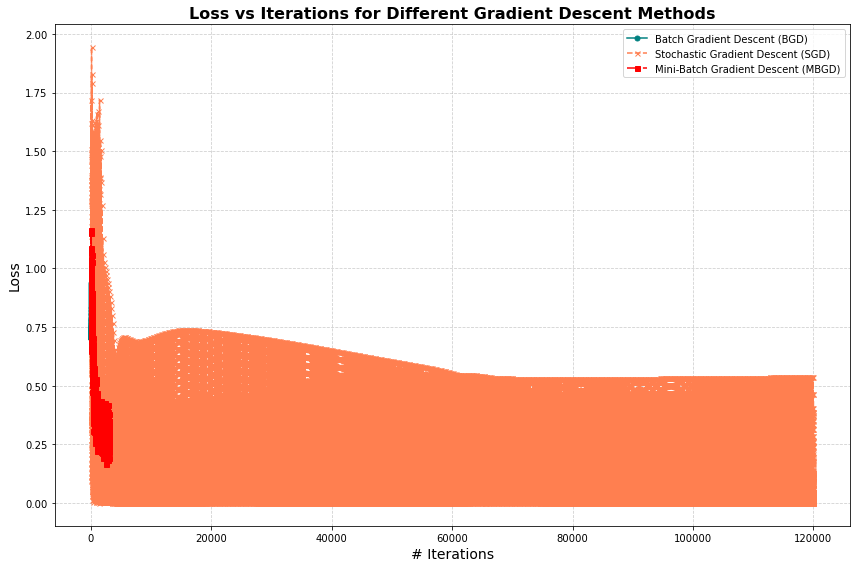

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

print("Khyati Khurana 21BDS0349")

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the target
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Network parameters
n_input = X_train.shape[1]
n_hidden = 5
n_output = y_train.shape[1]
learning_rate = 0.01
n_iterations = 1000
batch_size = 32

# Initialize the network
def initialize_network(n_input, n_hidden, n_output):
    w1 = np.random.randn(n_input, n_hidden)
    w2 = np.random.randn(n_hidden, n_output)
    return (w1, w2)

# Define forward pass
def forward_pass(x, w1, w2):
    a1 = np.dot(x, w1)
    z1 = np.sin(a1)
    a2 = np.dot(z1, w2)
    y_pred = np.sin(a2)
    return a1, z1, a2, y_pred

# Define loss function
def compute_loss(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

# Define backpropagation
def backpropagation(x, y, a1, z1, a2, y_pred, w1, w2, learning_rate=0.01):
    dL_dy_pred = 2 * (y_pred - y) / y.size
    dL_da2 = dL_dy_pred * np.cos(a2)
    dL_dw2 = np.dot(z1.T, dL_da2)

    dL_dz1 = np.dot(dL_da2, w2.T)
    dL_da1 = dL_dz1 * np.cos(a1)
    dL_dw1 = np.dot(x.T, dL_da1)

    w1 -= learning_rate * dL_dw1
    w2 -= learning_rate * dL_dw2

    return w1, w2

# Define training functions for BGD, SGD, and MBGD
def train_bgd(network, X_train, y_train, learning_rate, n_iterations):
    w1, w2 = network
    losses = []
    for epoch in range(n_iterations):
        a1, z1, a2, y_pred = forward_pass(X_train, w1, w2)
        loss = compute_loss(y_train, y_pred)
        losses.append(loss)
        w1, w2 = backpropagation(X_train, y_train, a1, z1, a2, y_pred, w1, w2, learning_rate)
        if epoch % 100 == 0:
            print(f'BGD Epoch {epoch}, Loss: {loss}')
    return losses

def train_sgd(network, X_train, y_train, learning_rate, n_iterations):
    w1, w2 = network
    losses = []
    for epoch in range(n_iterations):
        for i in range(X_train.shape[0]):
            x_i = X_train[i:i+1]
            y_i = y_train[i:i+1]
            a1, z1, a2, y_pred = forward_pass(x_i, w1, w2)
            loss = compute_loss(y_i, y_pred)
            losses.append(loss)
            w1, w2 = backpropagation(x_i, y_i, a1, z1, a2, y_pred, w1, w2, learning_rate)
        if epoch % 100 == 0:
            print(f'SGD Epoch {epoch}, Loss: {loss}')
    return losses

def train_mbgd(network, X_train, y_train, learning_rate, n_iterations, batch_size):
    w1, w2 = network
    losses = []
    num_batches = X_train.shape[0] // batch_size
    for epoch in range(n_iterations):
        for batch in range(num_batches):
            batch_indices = np.random.choice(X_train.shape[0], batch_size, replace=False)
            X_batch = X_train[batch_indices]
            y_batch = y_train[batch_indices]
            a1, z1, a2, y_pred = forward_pass(X_batch, w1, w2)
            loss = compute_loss(y_batch, y_pred)
            losses.append(loss)
            w1, w2 = backpropagation(X_batch, y_batch, a1, z1, a2, y_pred, w1, w2, learning_rate)
        if epoch % 100 == 0:
            print(f'MBGD Epoch {epoch}, Loss: {loss}')
    return losses

# Train using Batch Gradient Descent (BGD)
network_bgd = initialize_network(n_input, n_hidden, n_output)
losses_bgd = train_bgd(network_bgd, X_train, y_train, learning_rate, n_iterations)

# Train using Stochastic Gradient Descent (SGD)
network_sgd = initialize_network(n_input, n_hidden, n_output)
losses_sgd = train_sgd(network_sgd, X_train, y_train, learning_rate, n_iterations)

# Train using Mini-Batch Gradient Descent (MBGD)
network_mbgd = initialize_network(n_input, n_hidden, n_output)
losses_mbgd = train_mbgd(network_mbgd, X_train, y_train, learning_rate, n_iterations, batch_size)

# Plot the loss curves with enhanced aesthetics
plt.figure(figsize=(12, 8))

# Plot BGD loss curve
plt.plot(losses_bgd, label='Batch Gradient Descent (BGD)', color='teal', linestyle='-', marker='o', markersize=5)

# Plot SGD loss curve
plt.plot(losses_sgd, label='Stochastic Gradient Descent (SGD)', color='coral', linestyle='--', marker='x', markersize=5)

# Plot MBGD loss curve
plt.plot(losses_mbgd, label='Mini-Batch Gradient Descent (MBGD)', color='red', linestyle='-.', marker='s', markersize=5)

# Add title and labels
plt.title('Loss vs Iterations for Different Gradient Descent Methods', fontsize=16, fontweight='bold')
plt.xlabel('# Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend
plt.legend()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()
